# COLOR SPACE BASED CBIR SYSTEM
---

---
**Name : Aman Hussain**  
**Reg : 15BCE1077**  
**Description : Color Space Based Image Retrieval System**  
___

### Import Libraries

In [2]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load Image Dataset

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
images = load_images_from_folder('./data')

In [5]:
print("Total Images : {}".format(len(images)))

Total Images : 45


Since images loaded by OpenCV are in BGR colorspace, whereas matplotlib expects images in RGB format we will convert change the color space from BGR to RGB.

In [6]:
%%time
images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in images]

CPU times: user 212 ms, sys: 220 ms, total: 432 ms
Wall time: 155 ms


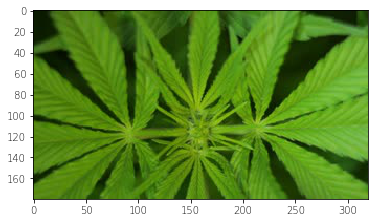

In [12]:
plt.imshow(images_rgb[25])

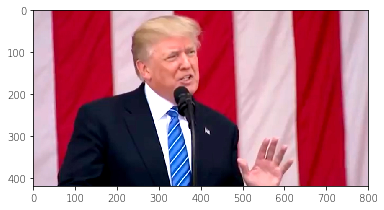

In [8]:
plt.imshow(images_rgb[30])

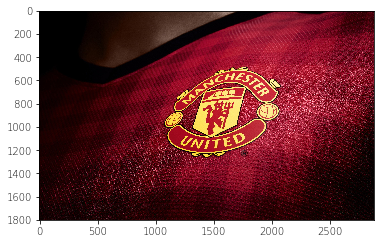

In [9]:
plt.imshow(images_rgb[35])

---
## QUESTION # 2
---

**Convert an image from RGB to HSV and back to RGB**

In [1]:
images_hsv = [cv2.cvtColor(image, cv2.COLOR_BGR2HSV) for image in images]

NameError: name 'images' is not defined

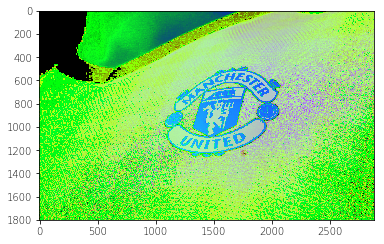

In [14]:
plt.imshow(images_hsv[35])

**Write the equations for conversion**

The R,G,B values are divided by 255 to change the range from 0..255 to 0..1

```
R' = R/255

G' = G/255

B' = B/255

Cmax = max(R', G', B')

Cmin = min(R', G', B')

delta = Cmax - Cmin
```

_Computing HSV values:_

```
HUE
- 0, if delta = 0
- 60 * (G' - B') * mod6 / delta, if Cmax = R'
- 60 * (B' - R') + 2 / delta, if Cmax = G'
- 60 * (R' - G') + 4 / delta, if Cmax = B'

SATURATION
- 0, if Cmax = 0
- delta/cmax, if Cmax = 0

Value
- Cmax
```
 

**Are they perceptually same?**

Even though different set of matrixes are used to store the image data, however a HSV image and a RGB image look the same.

**Show the RGB and HSV values of (100,100) pixel**

In [15]:
print("Image dimension : {}".format(images_hsv[0].shape))

Image dimension : (1080, 1920, 3)


For RGB:

In [16]:
print("Red: {}".format(images_rgb[0][100,100,0]))
print("Blue: {}".format(images_rgb[0][100,100,1]))
print("Green: {}".format(images_rgb[0][100,100,2]))

Red: 208
Blue: 170
Green: 161


For HSV:

In [17]:
print("Hue: {}".format(images_hsv[0][100,100,0]))
print("Saturation: {}".format(images_hsv[0][100,100,1]))
print("Value: {}".format(images_hsv[0][100,100,2]))

Hue: 6
Saturation: 58
Value: 208


---
## QUESTION # 3
---

### Creating Dataset

** 1) Image Dimensions Column**

In [49]:
def get_dimension(image):
    return image.shape

** 2) Mean of Color Channels**

In [45]:
def get_mean(img):
    mean_red = img[:,:,0].mean()
    mean_blue = img[:,:,1].mean()
    mean_green = img[:,:,2].mean()
    return (mean_red, mean_blue, mean_green)

** 3) Moment of Color Channels**

In [51]:
def get_moment(img):
    moment_red = cv2.moments(img[:,:,0])['m00']
    moment_blue = cv2.moments(img[:,:,1])['m00']
    moment_green = cv2.moments(img[:,:,2])['m00']
    return (moment_red, moment_blue, moment_green)

**Image Database**

In [59]:
imageDB = pd.DataFrame()

In [60]:
imageDB['image_matrix'] = images_rgb
imageDB['dimension'] = imageDB['image_matrix'].apply(get_dimension)
imageDB['mean'] = imageDB['image_matrix'].apply(get_mean)
imageDB['moment'] = imageDB['image_matrix'].apply(get_moment)

In [61]:
imageDB.head()

,image_matrix,dimension,mean,moment
0,"[[[128, 154, 57], [128, 154, 57], [128, 154, 5...","(1080, 1920, 3)","(129.034656154, 126.569539448, 77.6731843171)","(267566263.0, 262454597.0, 161063115.0)"
1,"[[[40, 73, 127], [43, 76, 130], [45, 78, 132],...","(340, 665, 3)","(52.4383237506, 65.4480185759, 91.4079345422)","(11856305.0, 14797797.0, 20667334.0)"
2,"[[[91, 108, 136], [100, 115, 144], [103, 118, ...","(1115, 1794, 3)","(118.255317426, 128.940006299, 144.475207843)","(236547294.0, 257919984.0, 288995203.0)"
3,"[[[100, 57, 67], [101, 58, 68], [102, 59, 69],...","(2554, 1971, 3)","(133.211793599, 137.469338494, 144.692597281)","(670579377.0, 692011577.0, 728372985.0)"
4,"[[[220, 232, 255], [220, 232, 255], [220, 232,...","(422, 759, 3)","(94.5970471249, 154.516481527, 223.581698918)","(30299245.0, 49491320.0, 71612771.0)"


In [62]:
def euclidean_distance(x=(0,0,0), y=(0,0,0)):
    return np.sqrt(np.square(x[0] - y[0]) 
                   + np.square(x[1] - y[1])
                   + np.square(x[2] - y[2]))

In [68]:
def get_similarity(query_img, DB):
    dimension = get_dimension(query_img)
    mean = get_mean(query_img)
    moment = get_moment(query_img)
    similarity_dimension = DB['dimension'].map(lambda x : euclidean_distance(dimension, x))
    similarity_mean = DB['mean'].map(lambda x : euclidean_distance(mean, x))
    similarity_moment = DB['moment'].map(lambda x : euclidean_distance(moment, x))
    return (similarity_dimension, similarity_mean, similarity_moment)

In [120]:
def query(query_img, DB, by='mean', rank=10):
    if by == 'dimension':
        dimension = get_dimension(query_img)
        similarity_dimension = DB['dimension'].map(lambda x : euclidean_distance(dimension, x))
        similarity_dimension = similarity_dimension.to_dict()
        similar_images_dimension = sorted(similarity_dimension, key=similarity_dimension.get)
        
        f, axarr = plt.subplots(rank, sharex=True, figsize=(10,30))
        f.suptitle('Similar Images by Dimension')
        for i in range(rank):
            similar_image = similar_images_dimension[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])
    
    elif by == 'mean':
        mean = get_mean(query_img)
        similarity_mean = DB['mean'].map(lambda x : euclidean_distance(mean, x))
        similarity_mean = similarity_mean.to_dict()
        similar_images_mean = sorted(similarity_mean, key=similarity_mean.get)

        f, axarr = plt.subplots(rank, sharex=True, figsize=(10,20))
        f.suptitle('Similar Images by Mean Color')
        for i in range(rank):
            similar_image = similar_images_mean[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])

    elif by == 'moment':
        # taking measures of the query image
        moment = get_moment(query_img)
        # finding the similarity measure
        similarity_moment = DB['moment'].map(lambda x : euclidean_distance(moment, x))
        # sorting the similar images
        similarity_moment = similarity_moment.to_dict()
        similar_images_moment = sorted(similarity_moment, key=similarity_moment.get)[:rank]
        # displaying the similar images
        f, axarr = plt.subplots(rank, sharex=True, figsize=(10,30))
        f.suptitle('Similar Images by Color Moment')
        for i in range(rank):
            similar_image = similar_images_moment[i]
            axarr[i].imshow(imageDB.iloc[similar_image][0])


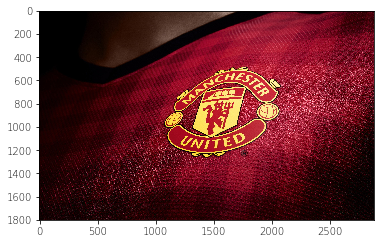

In [121]:
plt.imshow(images_rgb[35])

In [2]:
query(images_rgb[35],imageDB, by='moment', rank=10)

NameError: name 'query' is not defined